In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [39]:
df = pd.read_csv('crime.csv')

In [40]:
df.head(20)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000


In [41]:
df=(df.replace(',','', regex=True ))

In [42]:
df.drop([348,349,350])

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8.000,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1.000,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0.000,nan,0,12,18,405,99,291,15,0.000


In [43]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [44]:
df['Population'] = df.Population.astype(float)
df['Robbery'] = df.Robbery.astype(float)

In [45]:
df['PopSqr'] = df.Population**2

In [46]:
features = df[['City', 'Population', 'PopSqr', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']].copy()

In [47]:
features.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'Murder'}, inplace=True)
features.rename(columns={'Property\ncrime':'Property'}, inplace=True)
features['Property'] = features.Property.astype(float)

In [48]:
features['Robbery'] = np.where(features['Robbery']>0, 1, 0)
features['Murder'] = np.where(features['Murder']>0, 1, 0)

In [49]:
features = features.dropna()

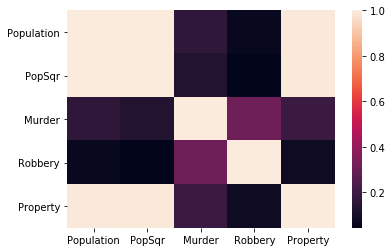

In [50]:
sns.heatmap(features.corr())

In [55]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['Property']
X = features[['Population','Robbery','Murder']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [1.68728222e-02 1.06994709e+02 6.07383740e+02]

Intercept: 
 -32.72226823930805

R-squared:
0.99344854357257


In [61]:
features = features[np.abs(features.Population-features.Population.mean()) <= (3*features.Population.std())]

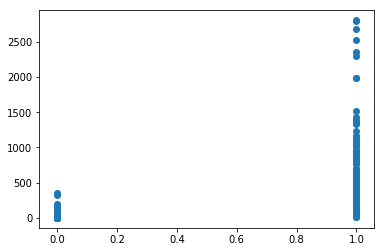

In [63]:
plt.scatter(features.Robbery, features.Property)